A Life of William Shakespeare
Chronology of the plays.  Metrical tests.


Collecting the data

In [1]:
# This is the URL I will load: https://www.gutenberg.org/cache/epub/23464/pg23464.txt
import requests

In [2]:
result = requests.get('https://www.gutenberg.org/cache/epub/23464/pg23464.txt')
text = result.text

In [ ]:
print(text)

In [14]:
pip install notebook

In [17]:
!pip install anaconda

  Preparing metadata (setup.py) ... done
  Created wheel for anaconda: filename=anaconda-0.0.1.1-py3-none-any.whl size=1095 sha256=af511bf080fe001066a7a8dde1729e293e9cce25221ff3d93ca4f9ae6925499f
  Stored in directory: /root/.cache/pip/wheels/f4/0e/c2/43856d772ce2bfb88c8941fffeacf376a0fe9cb426543c5708
Successfully built anaconda


In [ ]:
import sys
!{sys.executable} -m pip install  invisible-watermark
!conda install -y --quiet -c conda-forge \
    accelerate==0.23.0 \
    validators==0.22.0 \
    diffusers==0.18.2 \
    transformers==4.32.1 \
    tensorboardX \
    pillow \
    ipywidgets \
    ipython \
    sentencepiece

In [ ]:
!python -m pip install torch==2.0.1a0 torchvision==0.15.2a0 intel_extension_for_pytorch==2.0.110+xpu -f https://developer.intel.com/ipex-whl-stable-xpu

In [8]:
word_list = text.split(" ")
len(word_list)

174006


Exploratory Data Analysis

In [21]:
# Collecting the text file containing the list of Irish Poems.
!wget 'https://www.gutenberg.org/cache/epub/23464/pg23464.txt'

--2024-01-26 21:49:19--  https://www.gutenberg.org/cache/epub/23464/pg23464.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 976938 (954K) [text/plain]
Saving to: ‘pg23464.txt’

pg23464.txt         100%[===================>] 954.04K  5.22MB/s    in 0.2s    

2024-01-26 21:49:20 (5.22 MB/s) - ‘pg23464.txt’ saved [976938/976938]



In [22]:
pip install tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 1.3 MB/s eta 0:00:00


In [23]:
# Importing the required libraries.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Number of poem lines in our dataset: 19500
Number of unique words in our dataset: 15937

Minimum length of a sentence 2
Maximum length of a sentence 20



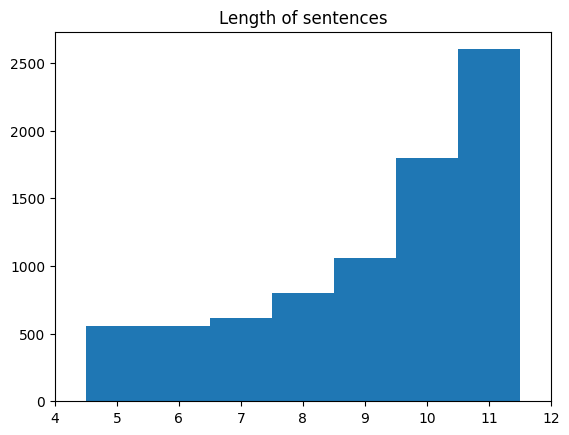

In [24]:
# Counting the number of lines in our dataset.
with open('pg23464.txt') as file:
    data = file.read().split('\n')[:-1]
    lines = len(data)
print('Number of poem lines in our dataset:', lines)

# Counting the number of unique words in our dataset.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
words = len(tokenizer.word_index)
print('Number of unique words in our dataset:', words)
print()

# Finding the minumum and maximum number of words in a sentence.
data_tokenized = tokenizer.texts_to_sequences(data)
lines_length = [len(sentence) for sentence in data_tokenized if len(sentence)>1]
print('Minimum length of a sentence', min(lines_length))
print('Maximum length of a sentence', max(lines_length))
print()

# Plotting a graph representing the words in different sentences.
plt.title('Length of sentences')
plt.hist(lines_length, bins=np.arange(5,13)-0.5)
plt.xlim([4, 12])
plt.show()

Preparing the Data
Steps:

Tokenizing the data, using a word tokenizer
Create n-gram sequences
Pre-padding the sentences to make them of equal lengths
Spliting the last word from each sentence to form label
Consider this example:

Sentence : 'Come all ye maidens young and fair'
Step-1 :
[51, 12, 96, 1217, 48, 2, 69]

Step-2 :
[51, 12] [51, 12, 96] [51, 12, 96, 1217] [51, 12, 96, 1217, 48] [51, 12, 96, 1217, 48, 2] [51, 12, 96, 1217, 48, 2, 69]

Step-3 :
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2, 69]

Step-4 :
Final training sequences and labels: [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51]                [12] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12]              [96] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96]            [1217] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217]     [48] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48]   [2] [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2]   [69]

In [25]:
# Opening the text file containing the Shakespeare Sonnets.
with open('pg23464.txt') as file:
    data = file.read().split('\n')[:-1]
data = [sentence for sentence in data if len(sentence.split())>1]

# Tokenizing the data, using word tokenizer.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
data_tokenized = tokenizer.texts_to_sequences(data)

# Creating the n-gram sequences.
training_sequences = []
for sequence in data_tokenized:
    for i in range(2,len(sequence)+1):
        training_sequences.append(sequence[:i])

# Pre-padding the data with zeros.
data_padded = pad_sequences(training_sequences)

# Preparing the training data.
x_train, y_train = data_padded[:,:-1], data_padded[:,-1]


Training the model
We are using a Sequential model with the following layers:

Embedding
Bidirectional LSTM
Dropout
LSTM
Dense
Dense
We are also using the following parameters:

vocab_size = len(tokenizer.word_index) + 1
wv_dims = 100
input_length = x_train.shape[1]
dropout_rate = 0.2
lstm_units = 128
regularization_rate = 0.01
epochs = 60

In [26]:
# Setting the parameters for our model.
vocab_size = len(tokenizer.word_index) + 1
wv_dims = 100
input_length = x_train.shape[1]
dropout_rate = 0.2
lstm_units = 128
regularization_rate = 0.01
epochs = 60

In [ ]:
# Building a sequential model with Bidirectional LSTM and LSTM layers.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, wv_dims, input_length=input_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.LSTM(lstm_units))
model.add(tf.keras.layers.Dense(vocab_size//4, activation='relu',
                                activity_regularizer=tf.keras.regularizers.l2(regularization_rate)))
model.add(tf.keras.layers.Dense(vocab_size, activation='softmax'))

# Printing the summary of our model.
model.summary()

# Compiling our model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Finally, training the model.
history = model.fit(x_train, y_train, epochs=epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           1592400   
                                                                 
 bidirectional (Bidirectiona  (None, 19, 256)          234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 3981)              513549    
                                                                 
 dense_1 (Dense)             (None, 15924)             63409368  
                                                        